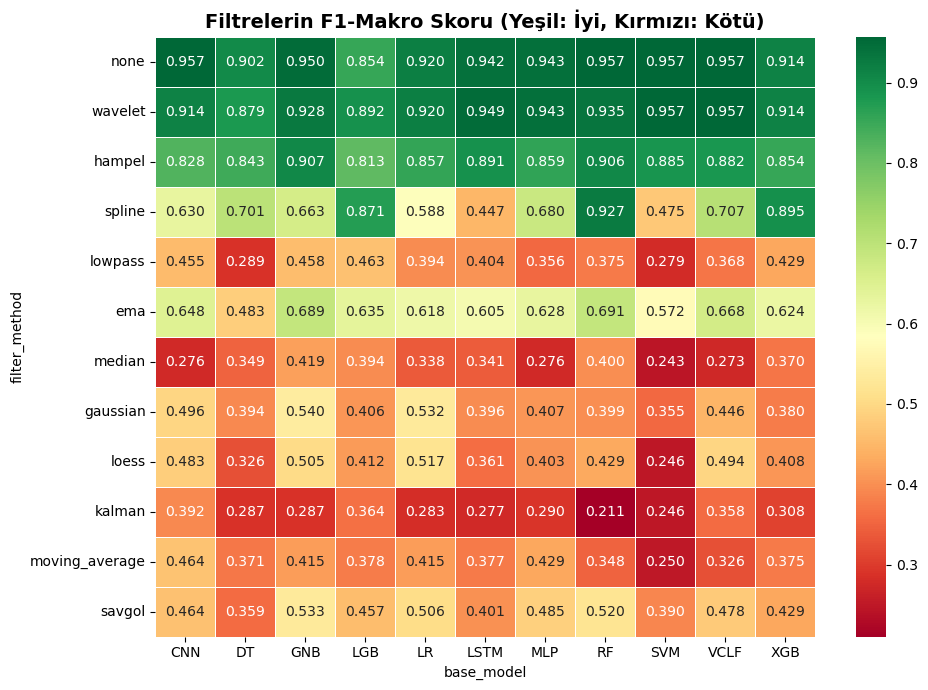

In [ ]:
# notebooks/visualize_filters.ipynb içindeki kod
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Dosya yolu (run_filtered.py çıktısı)
FILE_PATH = "../results/tables-filtered/filtered_metrics_all.csv"

if os.path.exists(FILE_PATH):
    df = pd.read_csv(FILE_PATH)
    pivot_table = df.pivot(index="filter_method", columns="base_model", values="f1_macro")
    
    # Sıralama
    desired_order = ["none", "wavelet",  "hampel", "spline", "lowpass", "ema", "median", "gaussian", "loess", "kalman", "moving_average", "savgol"]
    pivot_table = pivot_table.reindex([f for f in desired_order if f in pivot_table.index])

    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="RdYlGn", linewidths=.5)
    plt.title("Filtrelerin F1-Makro Skoru (Yeşil: İyi, Kırmızı: Kötü)", fontsize=14, fontweight='bold')
    save_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/heat_map_filtered_f1.pdf"
    plt.savefig(save_path, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

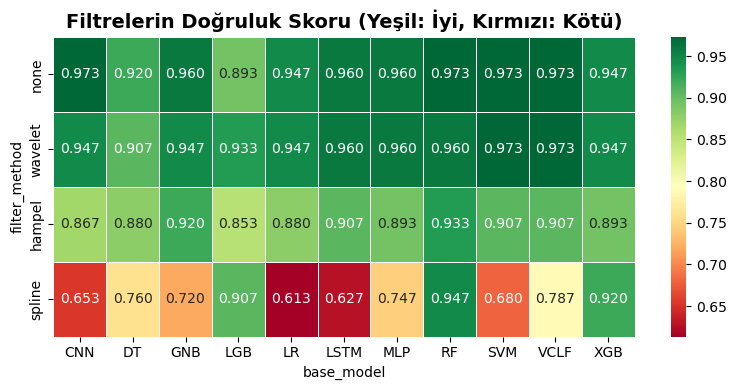

In [6]:
# notebooks/visualize_filters.ipynb içindeki kod
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Dosya yolu (run_filtered.py çıktısı)
FILE_PATH = "../results/tables-filtered/filtered_metrics_all.csv"

if os.path.exists(FILE_PATH):
    df = pd.read_csv(FILE_PATH)
    pivot_table = df.pivot(index="filter_method", columns="base_model", values="accuracy")
    
    # Sıralama
    desired_order = ["none", "wavelet","hampel", "spline"]
    pivot_table = pivot_table.reindex([f for f in desired_order if f in pivot_table.index])

    plt.figure(figsize=(8, 4))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="RdYlGn", linewidths=.5)
    plt.title("Filtrelerin Doğruluk Skoru (Yeşil: İyi, Kırmızı: Kötü)", fontsize=14, fontweight='bold')
    save_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/heat_map_filtered_acc.png"
    plt.savefig(save_path, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

📊 En İyi Filtreli Modellerin Hata Matrisleri Çiziliyor...
Top 6 Model:
  base_model filter_method  f1_macro
0         RF          none  0.956944
4       VCLF          none  0.956583
5       VCLF       wavelet  0.956583
1        CNN          none  0.956583
3        SVM       wavelet  0.956583
2        SVM          none  0.956583


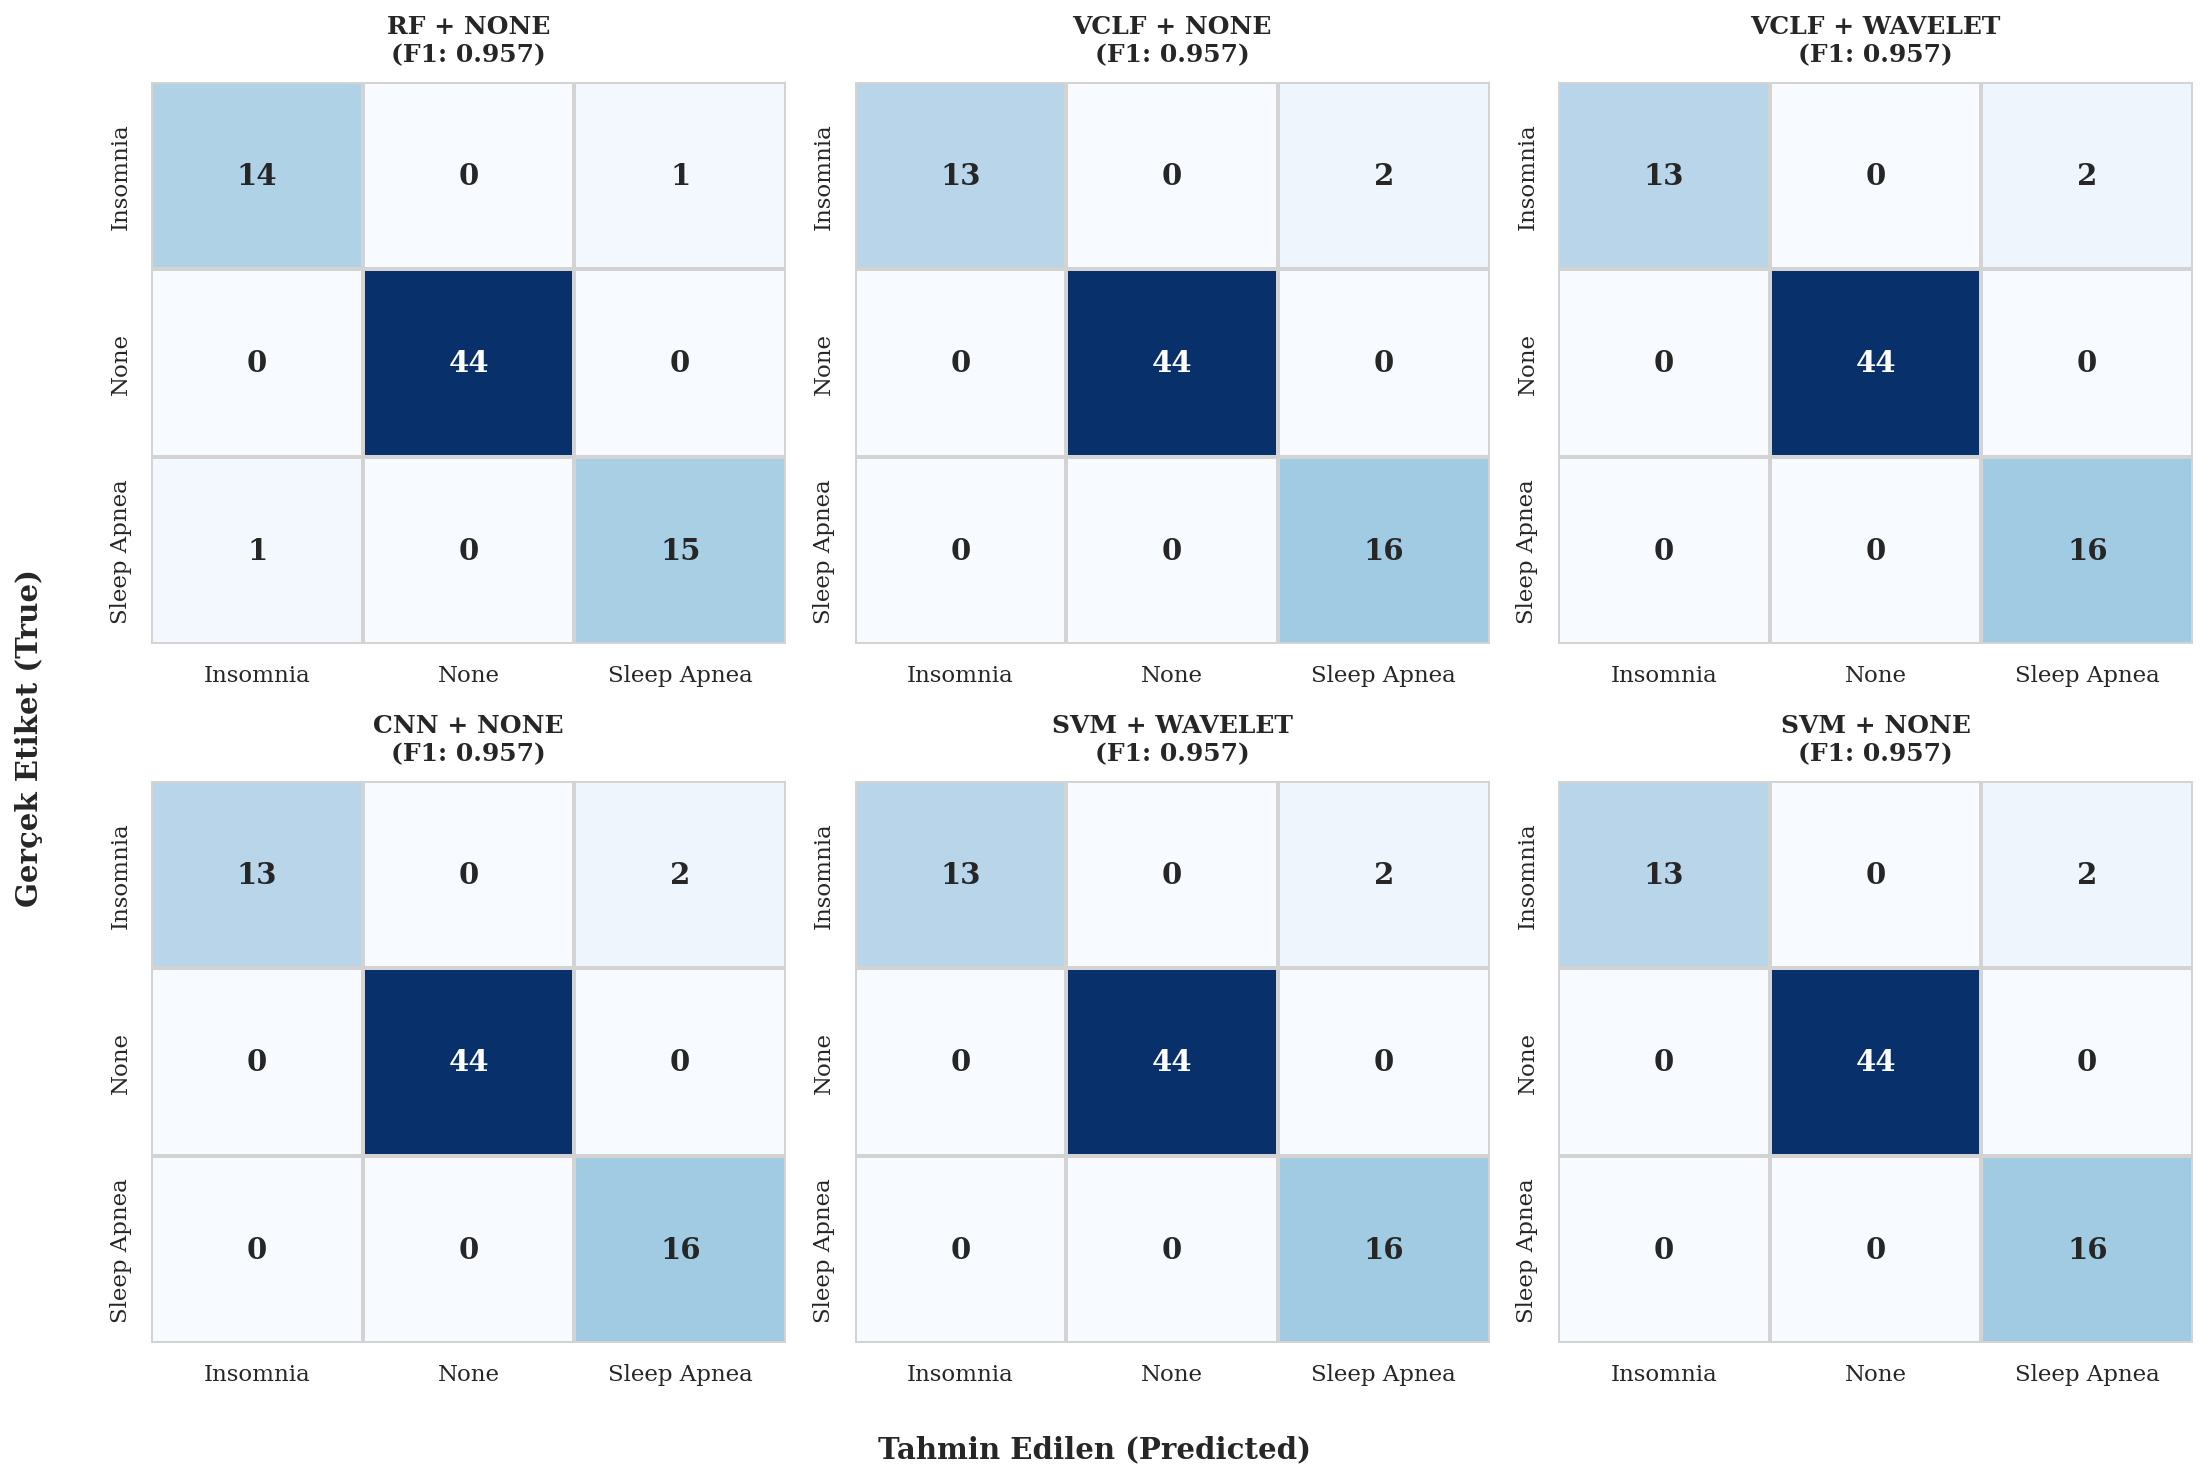

✅ Görsel kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/confusion_matrices_top_filtered.png


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

# Görsel Ayarları
sns.set(style="white")
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.family"] = "serif"

# Dosya Yolları
METRICS_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/filtered_metrics_all.csv"
TABLES_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/"

print("📊 En İyi Filtreli Modellerin Hata Matrisleri Çiziliyor...")

if os.path.exists(METRICS_PATH):
    # 1. Sonuçları Oku ve Sırala
    df = pd.read_csv(METRICS_PATH)
    # En yüksek F1 skoruna sahip ilk 6 modeli al
    top_models = df.sort_values(by="f1_macro", ascending=False).head(6)
    
    print(f"Top 6 Model:\n{top_models[['base_model', 'filter_method', 'f1_macro']]}")

    # 2. Grid Ayarları (2 Satır x 3 Sütun)
    n_cols = 3
    n_rows = math.ceil(len(top_models) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() 
    
    cmap = "Blues" # Başarı rengi

    for i, (index, row) in enumerate(top_models.iterrows()):
        model_name = row['base_model']
        filter_name = row['filter_method']
        score = row['f1_macro']
        
        # Dosya adını oluştur (run_filtered.py dosyasında kaydettiğimiz format)
        cm_filename = f"confusion_matrix_{model_name}_{filter_name}.csv"
        cm_path = os.path.join(TABLES_DIR, cm_filename)
        
        ax = axes[i]
        
        if os.path.exists(cm_path):
            cm_df = pd.read_csv(cm_path, index_col=0, na_filter=False)
            
            sns.heatmap(
                cm_df, 
                annot=True, 
                fmt="d", 
                cmap=cmap, 
                cbar=False, 
                ax=ax, 
                linewidths=1, 
                linecolor='lightgray',
                annot_kws={"size": 14, "weight": "bold"}
            )
            
            # Başlık: "SVM + Wavelet (F1: 0.957)"
            title = f"{model_name} + {filter_name.upper()}\n(F1: {score:.3f})"
            ax.set_title(title, fontweight='bold', size=12, pad=10)
            ax.set_xlabel(""); ax.set_ylabel("")
            
        else:
            ax.text(0.5, 0.5, "Dosya Bulunamadı", ha='center', va='center', color='red')
            ax.set_title(f"{model_name} + {filter_name}")

    # Boş kalan grafikleri gizle
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ortak Eksen İsimleri
    fig.text(0.5, 0.02, 'Tahmin Edilen (Predicted)', ha='center', fontsize=14, fontweight='bold')
    fig.text(0.02, 0.5, 'Gerçek Etiket (True)', va='center', rotation='vertical', fontsize=14, fontweight='bold')

    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout(rect=[0.05, 0.05, 1, 1]) # type: ignore
    
    save_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/confusion_matrices_top_filtered.png"
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Görsel kaydedildi: {save_path}")

else:
    print("❌ Metrik dosyası bulunamadı. Önce run_filtered.py çalıştırılmalı.")

📊 En İyi Modellerin Hata Matrisleri (3x3 Grid) Hazırlanıyor...

🏆 LİSTEYE GİREN İLK 9 MODEL:

  base_model filter_method  f1_macro
0         RF          none  0.956944
1        CNN          none  0.956583
2        SVM          none  0.956583
3        SVM       wavelet  0.956583
4       VCLF          none  0.956583
5       VCLF       wavelet  0.956583
6        GNB          none  0.949889
7       LSTM       wavelet  0.949369
8        MLP          none  0.943077


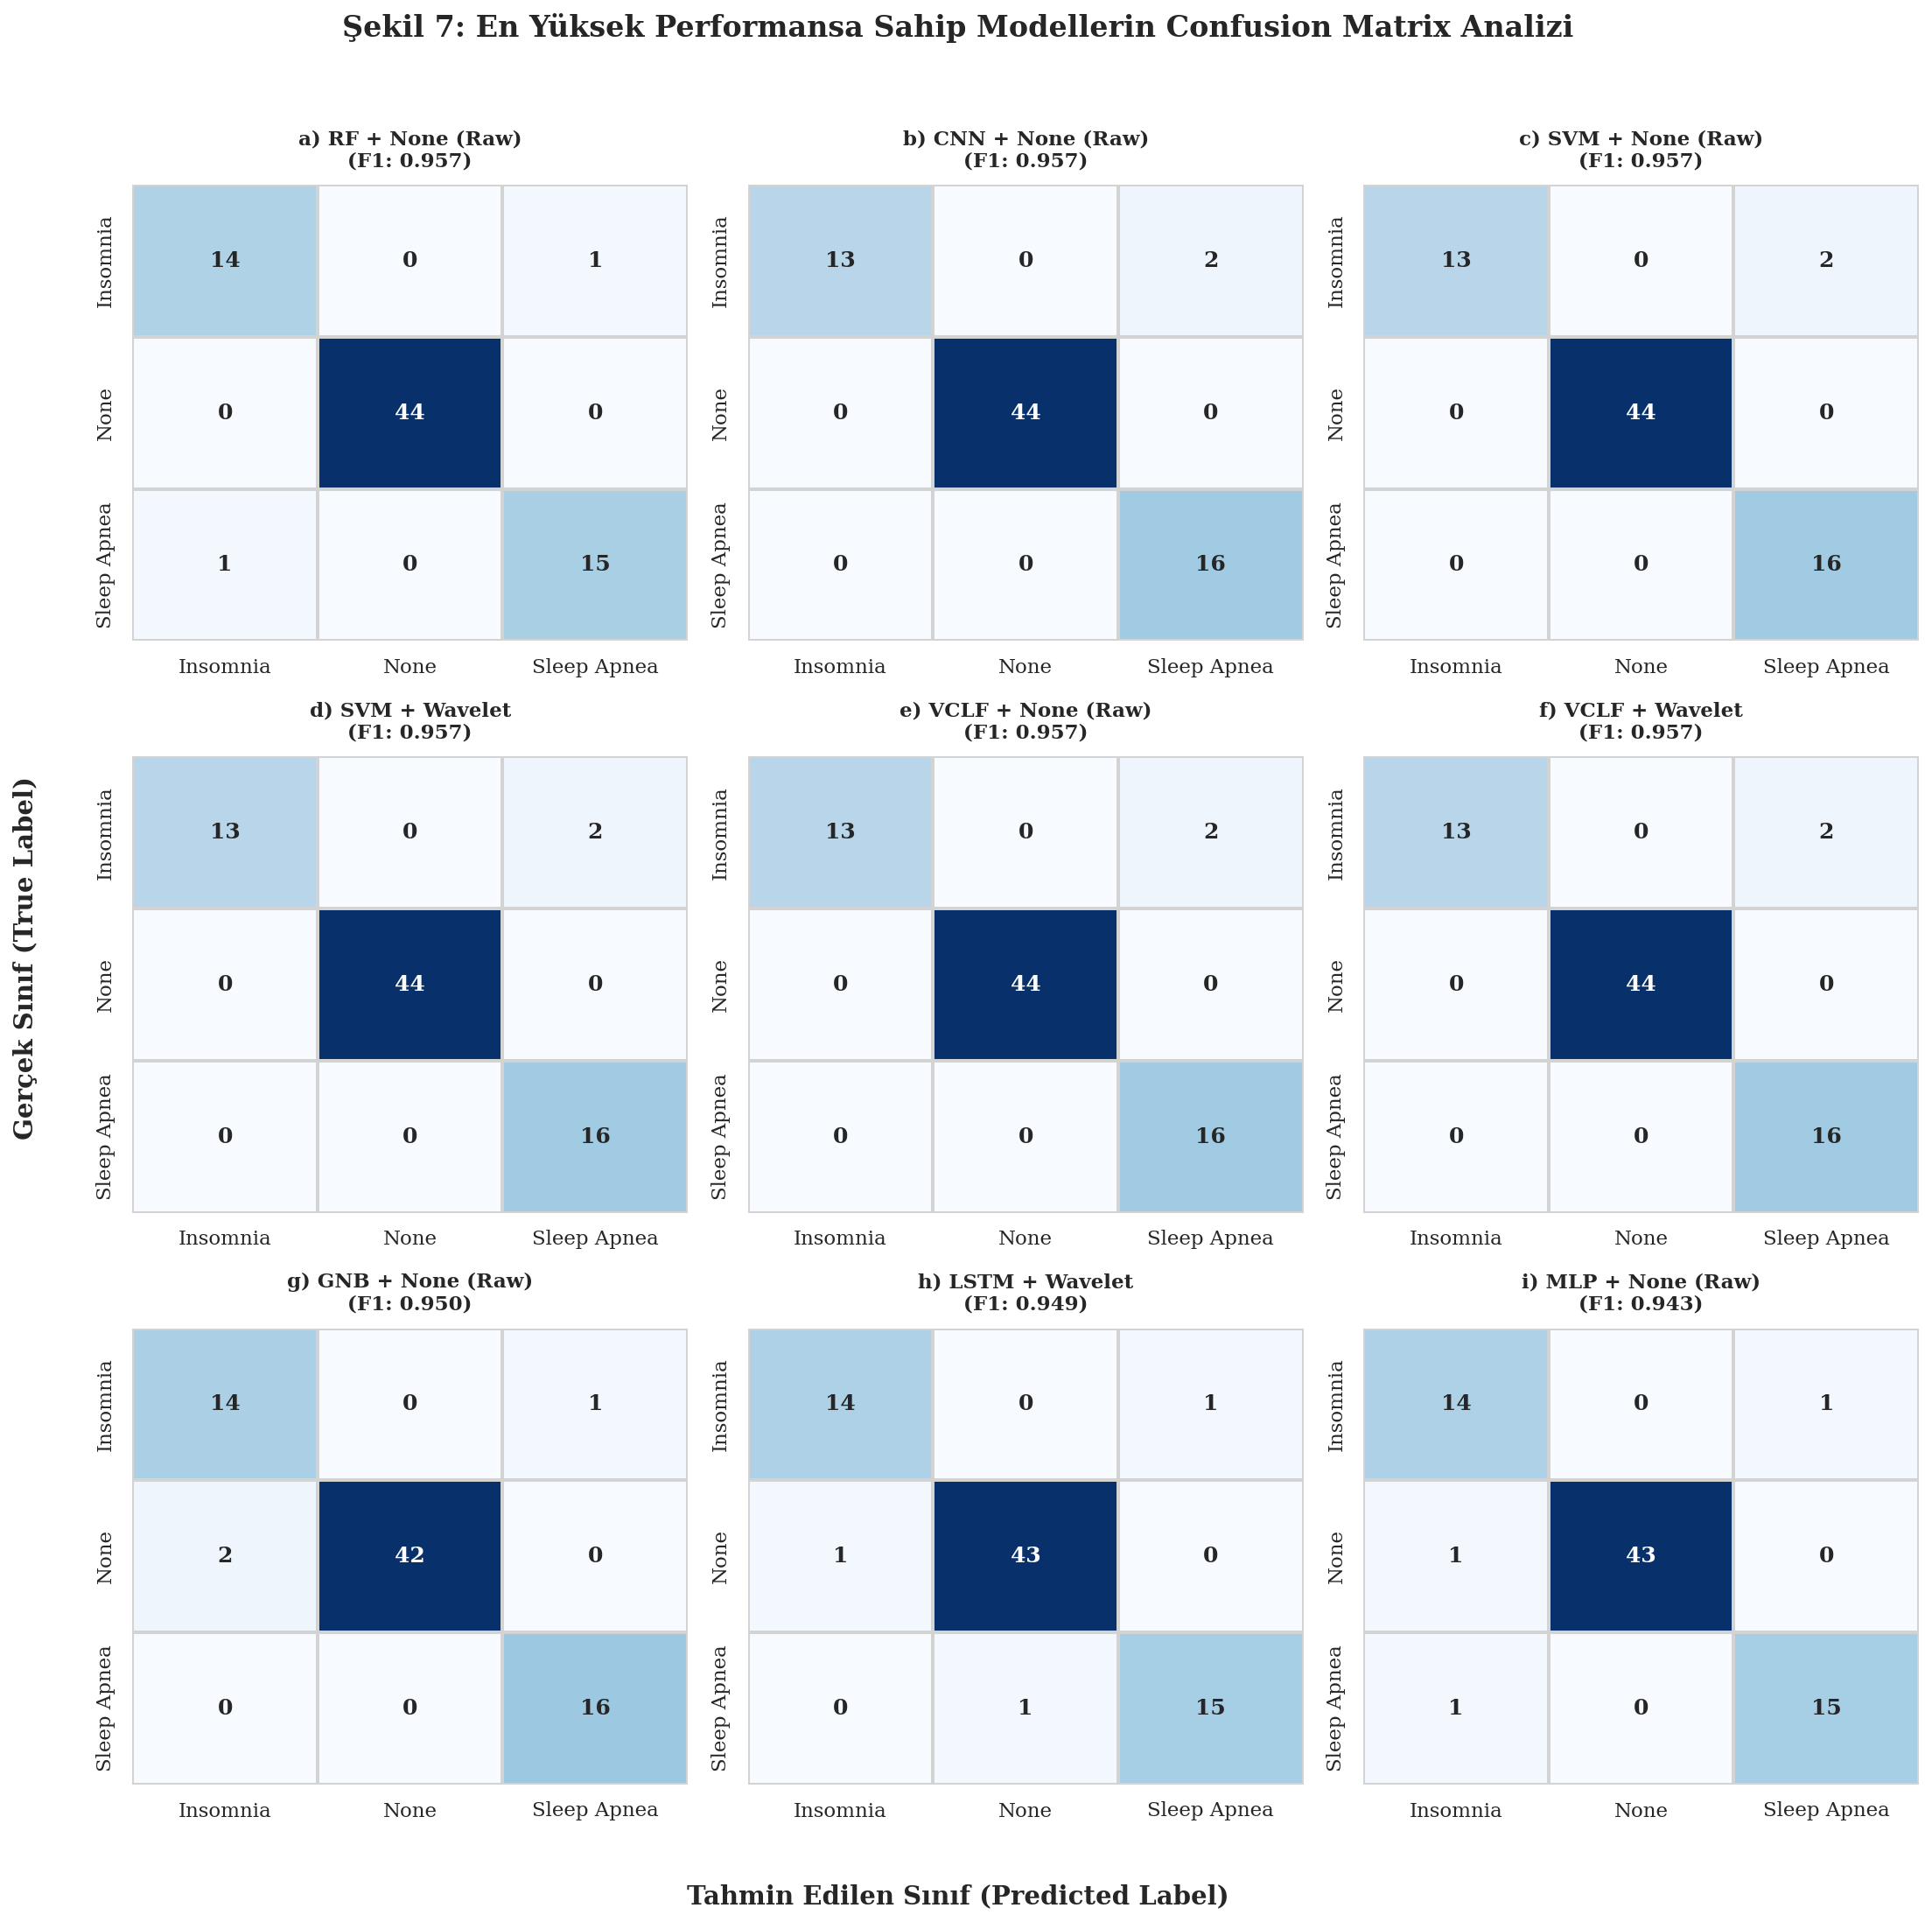

✅ Şeffaf ve Kapsayıcı Grafik Kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Confusion_Matrix_Top9_Transparent.png


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

# =====================================================
# AYARLAR
# =====================================================
METRICS_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/filtered_metrics_all.csv"
TABLES_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/"
OUTPUT_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Confusion_Matrix_Top9_Transparent.png"

# Görsel Ayarları
sns.set_theme(style="white")
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.family"] = "serif"

def plot_all_top_models():
    print("📊 En İyi Modellerin Hata Matrisleri (3x3 Grid) Hazırlanıyor...")

    if not os.path.exists(METRICS_PATH):
        print(f"❌ Metrik dosyası bulunamadı: {METRICS_PATH}")
        return

    # 1. Sonuçları Oku
    df = pd.read_csv(METRICS_PATH)
    
    # 2. SIRALAMA (Deterministik - Rastgelelik Yok!)
    # Önce F1 skoruna göre (Büyükten küçüğe), Eşitlik varsa Model Adına göre (A'dan Z'ye)
    # Böylece her çalıştırdığında aynı sıralama gelir.
    df = df.sort_values(by=['f1_macro', 'base_model'], ascending=[False, True])
    
    # İlk 9 Modeli Seç (Böylece puanı eşit olan herkes sığar)
    top_models = df.head(9)

    print(f"\n🏆 LİSTEYE GİREN İLK 9 MODEL:\n")
    print(top_models[['base_model', 'filter_method', 'f1_macro']])

    # 3. Grid Ayarları (3 Satır x 3 Sütun)
    n_cols = 3
    n_rows = 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    axes = axes.flatten()
    
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    cmap = "Blues"

    for i, (index, row) in enumerate(top_models.iterrows()):
        model_name = row['base_model']
        filter_name = row['filter_method']
        score = row['f1_macro']
        
        # Dosya adını oluştur
        cm_filename = f"confusion_matrix_{model_name}_{filter_name}.csv"
        cm_path = os.path.join(TABLES_DIR, cm_filename)
        
        ax = axes[i]
        
        if os.path.exists(cm_path):
            try:
                cm_df = pd.read_csv(cm_path, index_col=0, na_filter=False)
                
                # Heatmap Çizimi
                sns.heatmap(
                    cm_df, 
                    annot=True, 
                    fmt="d", 
                    cmap=cmap, 
                    cbar=False, 
                    ax=ax, 
                    linewidths=1, 
                    linecolor='lightgray',
                    annot_kws={"size": 12, "weight": "bold"}
                )
                
                # Başlığı Süsle
                disp_filter = filter_name.capitalize()
                if filter_name == "none": disp_filter = "None (Raw)"
                if filter_name == "wavelet": disp_filter = "Wavelet"
                
                title = f"{letters[i]}) {model_name} + {disp_filter}\n(F1: {score:.3f})"
                ax.set_title(title, fontweight='bold', size=11, pad=10)
                ax.set_xlabel(""); ax.set_ylabel("")
                
            except Exception as e:
                ax.text(0.5, 0.5, "Hata", ha='center', va='center', color='red')
        else:
            ax.text(0.5, 0.5, "Dosya Yok", ha='center', va='center', color='red')
            ax.set_title(f"{model_name}")

    # Boş kalan kutuları temizle (Eğer 9'dan az model varsa)
    for j in range(len(top_models), len(axes)):
        fig.delaxes(axes[j])

    # Ortak Eksen İsimleri
    fig.text(0.5, 0.02, 'Tahmin Edilen Sınıf (Predicted Label)', ha='center', fontsize=14, fontweight='bold')
    fig.text(0.02, 0.5, 'Gerçek Sınıf (True Label)', va='center', rotation='vertical', fontsize=14, fontweight='bold')

    plt.suptitle("Şekil 7: En Yüksek Performansa Sahip Modellerin Confusion Matrix Analizi", fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])
    plt.savefig(OUTPUT_PATH, bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"✅ Şeffaf ve Kapsayıcı Grafik Kaydedildi: {OUTPUT_PATH}")

if __name__ == "__main__":
    plot_all_top_models()